In [1]:
from fantasticfeatures.dataset_noise_generator import *
from fantasticfeatures.plotting import *
import numpy as np

import pandas as pd

C:\Users\TK\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Generate basis data: 

In [2]:
num_indep = 5
n_sample = 1000
bias = 10

X_base, y_base, coeffs = make_regression_custom(n_samples=n_sample, n_features=num_indep, n_informative=num_indep,
                   tail_strength=0, bias=bias, n_targets=1, noise=0, 
                       shuffle=False, coef=True, random_state=21, custom_coef=[1])


not all coefficients present, reverted to random coeffs


In [3]:
coeffs

array([33.69420808, 82.2582879 , 53.59961804, 48.71728899, 69.24151234])

In [4]:
y_check = theoretical_function_linear(X_base, coeffs, bias=bias)

mean abs Y:  109.74412936878156
mean abs noise:  0.0
mean SNR:  inf


D:\ds_freelance\2021_amld_workshop\code\fantasticfeatures\fantasticfeatures\dataset_noise_generator.py:122: RuntimeWarning: divide by zero encountered in true_divide
  print('mean SNR: ',(np.abs(Y_base/noise_y)).mean())


In [6]:
df = data_to_df(X_base,y_base)

In [7]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'y'], dtype='object')

In [4]:
linear_subset = ['x0', 'x1', 'x2', 'x3', 'x4']

In [ ]:
df['y_noisy'] = df['y'] + gen_noise(df['y'].to_numpy(),10,'normal')

In [110]:
df[linear_subset + ['y_noisy']].to_csv('mystery_linear.csv')

___

## Create nonlinear columns: 

### mystery_nonlinear_1: 

In [8]:
df['x3_2'] = df['x3']**2

In [9]:
nonlinear_subset = ['x0', 'x1', 'x2', 'x3_2', 'x4']

In [11]:
df['y_nonlin'] = theoretical_function_linear(df[nonlinear_subset].to_numpy(), coeffs, bias=bias)

mean abs Y:  122.34482675196742
mean abs noise:  0.0
mean SNR:  inf


In [19]:
df['y_nonlin_noisy'] = df['y_nonlin'] + gen_noise(df['y_nonlin'].to_numpy(),10,'normal')

In [ ]:
# nonlinear_subset = ['x0', 'x1', 'x2', 'x3_2', 'x4']
df[linear_subset + ['y_nonlin_noisy']].to_csv('mystery_nonlinear_1.csv')

### mystery_nonlinear_2: 

In [23]:
df['x1_l'] = df['x1'].apply(lambda x: np.log(np.abs(x)))

In [24]:
df['x1_s'] = df['x1'].apply(lambda x: np.sqrt(np.abs(x)))

In [25]:
df['x2_e'] = (df['x1'].apply(np.exp))/4

In [27]:
nonlinear_subset_2 = ['x0', 'x1_l', 'x2_e', 'x3_2', 'x4']

In [28]:
df['y_nonlin_2'] = theoretical_function_linear(df[nonlinear_subset_2].to_numpy(), coeffs, bias=bias)

mean abs Y:  112.3594231985254
mean abs noise:  0.0
mean SNR:  inf


D:\ds_freelance\2021_amld_workshop\code\fantasticfeatures\fantasticfeatures\dataset_noise_generator.py:122: RuntimeWarning: divide by zero encountered in true_divide
  print('mean SNR: ',(np.abs(Y_base/noise_y)).mean())


In [29]:
df['y_nonlin_2_noisy'] = df['y_nonlin_2'] + gen_noise(df['y_nonlin_2'].to_numpy(),10,'normal')

In [111]:
# nonlinear_subset_2 = ['x0', 'x1_l', 'x2_e', 'x3_2', 'x4']
df[linear_subset + ['y_nonlin_2_noisy']].to_csv('mystery_nonlinear_2.csv')

### mystery_nonlinear_3

Sometimes we may measure y, which is a nonlinear function of x - for example, measuring sound level in dB as a function of sound energy. 

In [31]:
df['y_abs'] = theoretical_function_linear(df[linear_subset].apply(np.abs).to_numpy(), coeffs, bias=bias)

mean abs Y:  239.71079971652873
mean abs noise:  0.0
mean SNR:  inf


D:\ds_freelance\2021_amld_workshop\code\fantasticfeatures\fantasticfeatures\dataset_noise_generator.py:122: RuntimeWarning: divide by zero encountered in true_divide
  print('mean SNR: ',(np.abs(Y_base/noise_y)).mean())


In [33]:
df['y_abs_l'] = df['y_abs'].apply(lambda x: np.log(np.abs(x)))*50

In [35]:
df['y_abs_l_noisy'] = df['y_abs_l'] + gen_noise(df['y_abs_l'].to_numpy(),10,'normal')

In [ ]:
df_abs = df[linear_subset].apply(np.abs)

In [37]:
df_abs['y_noisy'] = df['y_abs_l_noisy']

In [116]:
# y => log(y), all abs 
df_abs[linear_subset + ['y_noisy']].to_csv('mystery_nonlinear_3.csv')

### mystery_nonlinear_4:

In [38]:
df_abs

,x0,x1,x2,x3,x4,y_noisy
0,0.051964,0.111196,1.041797,1.256739,0.745388,260.815464
1,1.711054,0.205864,0.234571,1.128144,0.012626,272.092134
2,0.613200,1.373688,1.610992,0.689228,0.691924,289.901670
3,0.448116,0.162342,0.257229,1.275456,0.064004,252.173899
4,1.061857,0.989368,0.457723,1.984182,1.476442,291.434796
...,...,...,...,...,...,...
995,0.562333,1.228321,1.049781,1.215147,0.281870,273.991659
996,1.651902,1.231726,0.105725,0.680306,0.693801,260.867816
997,0.445001,0.810530,0.578105,0.245080,0.970373,270.746436
998,1.677446,0.090463,0.762729,1.383376,1.508284,265.122778


In [39]:
df_abs['x0_s'] = np.sqrt(df_abs['x0'])

In [42]:
df_abs['x4_o'] = 1/(1+(df_abs['x4']))

In [45]:
nonlin3 = ['x0_s','x1','x2','x3','x4_o']

In [46]:
df_abs['y_nonlin3'] = theoretical_function_linear(df_abs[nonlin3].to_numpy(), coeffs, bias=bias)

mean abs Y:  226.88135381299227
mean abs noise:  0.0
mean SNR:  inf


D:\ds_freelance\2021_amld_workshop\code\fantasticfeatures\fantasticfeatures\dataset_noise_generator.py:122: RuntimeWarning: divide by zero encountered in true_divide
  print('mean SNR: ',(np.abs(Y_base/noise_y)).mean())


In [48]:
df_abs['y_nonlin3_noisy'] = df_abs['y_nonlin3'] + gen_noise(df_abs['y_nonlin3'].to_numpy(),10,'normal')

In [50]:
df_abs[linear_subset+['y_nonlin3_noisy']].to_csv('./data/ex1/mystery_nonlinear_4.csv')

### mystery_nonlinear_5: 

In [54]:
df_abs['x2_3'] = (df_abs['x2']**3)/5

In [58]:
df_abs['x1_e'] = np.exp(df_abs['x1'])/5

In [61]:
nonlin4 = ['x0','x1_e','x2_3','x3','x4']

In [62]:
df_abs['y_nonlin4'] = theoretical_function_linear(df_abs[nonlin4].to_numpy(), coeffs, bias=bias)

mean abs Y:  194.5745246528086
mean abs noise:  0.0
mean SNR:  inf


D:\ds_freelance\2021_amld_workshop\code\fantasticfeatures\fantasticfeatures\dataset_noise_generator.py:122: RuntimeWarning: divide by zero encountered in true_divide
  print('mean SNR: ',(np.abs(Y_base/noise_y)).mean())


In [67]:
df_abs['y_nonlin4b'] = df_abs['y_nonlin4'].apply(lambda x: (x**2) / 1000)

In [77]:
df_abs['y_nonlin4b_noisy'] = df_abs['y_nonlin4b'] + gen_noise(df_abs['y_nonlin4b'].to_numpy(),1,'cauchy', truncate=20)

1000.0
30


In [78]:
df_abs[linear_subset+['y_nonlin4b_noisy']].to_csv('./data/ex1/mystery_nonlinear_5.csv')

### Data export

In [106]:
df.to_csv('data_with_nonlinearity.csv')

___

### Solution mystery_nonlinear_4: 

Model and plot dashboards: 

./data/ex1/mystery_nonlinear_1.csv
Expected error estimate: -1.1068923555512811e-15
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     603.2
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          1.64e-267
Time:                        15:57:38   Log-Likelihood:                -4472.1
No. Observations:                 800   AIC:                             8956.
Df Residuals:                     794   BIC:                             8984.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     135.7
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          5.80e-104
Time:                        15:57:41   Log-Likelihood:                -4129.8
No. Observations:                 800   AIC:                             8272.
Df Residuals:                     794   BIC:                             8300.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.6287      4.796    -14.310      0.0

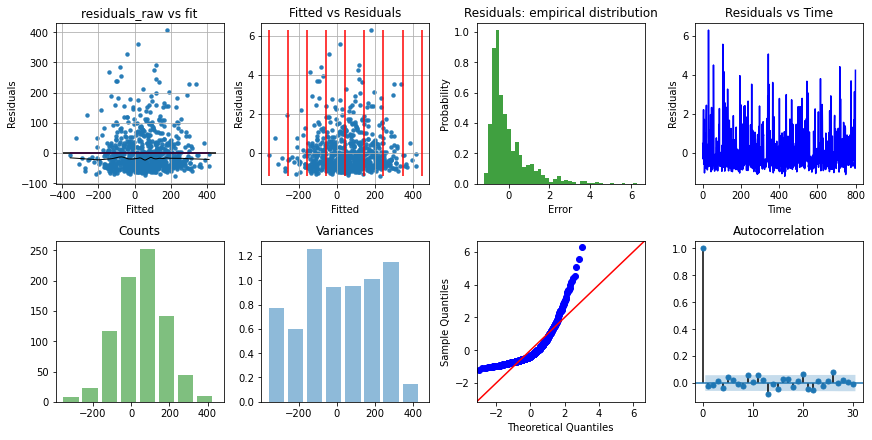

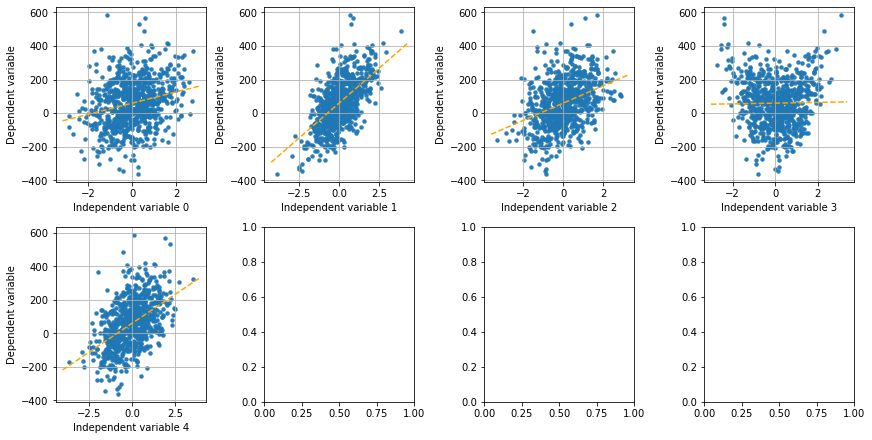

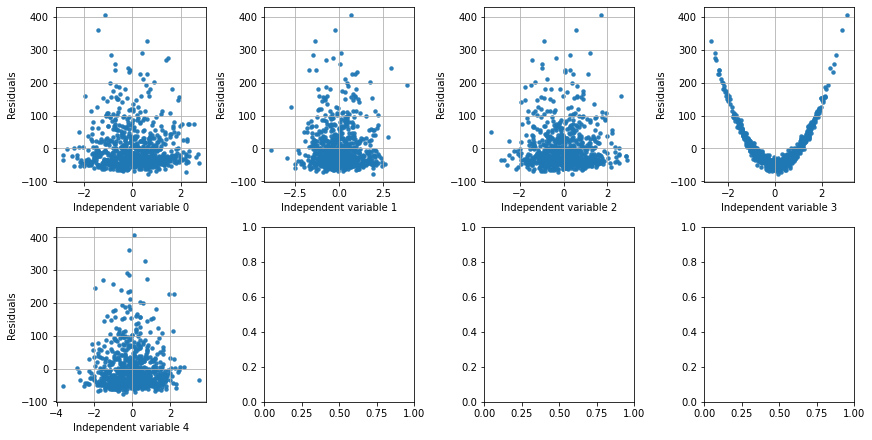

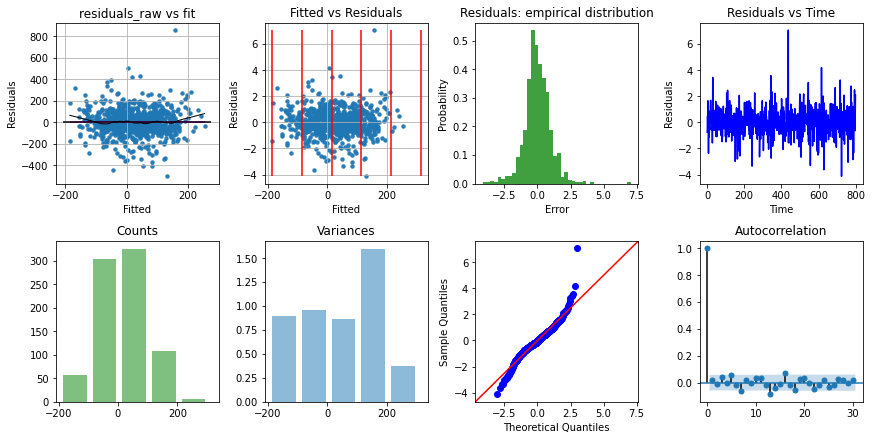

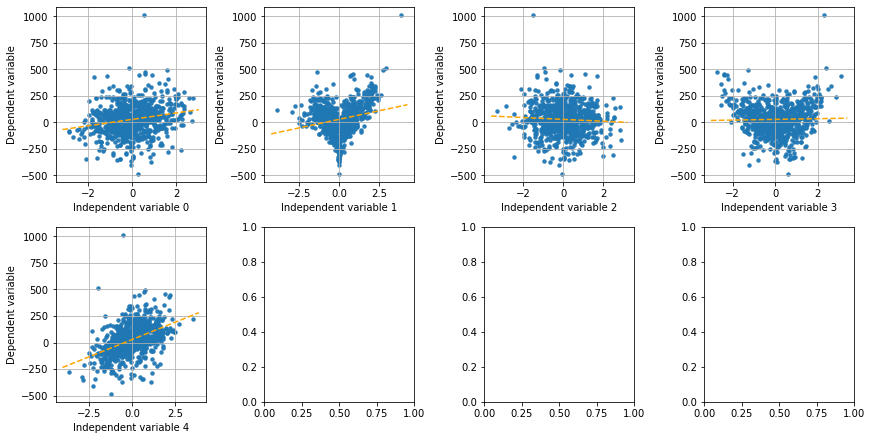

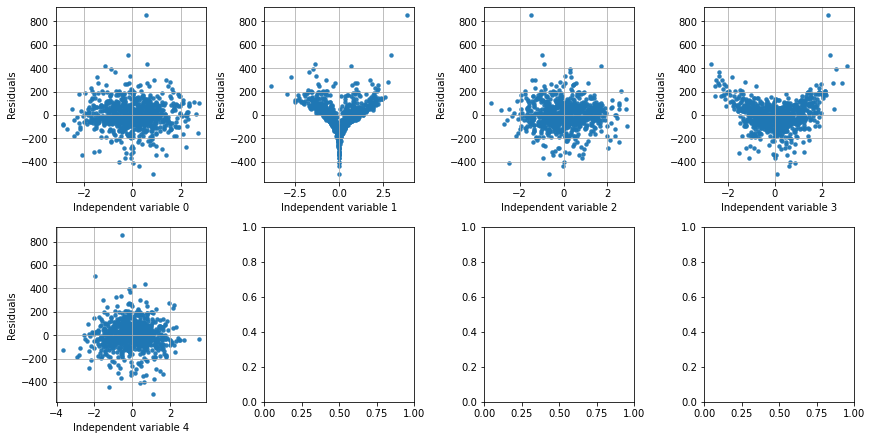

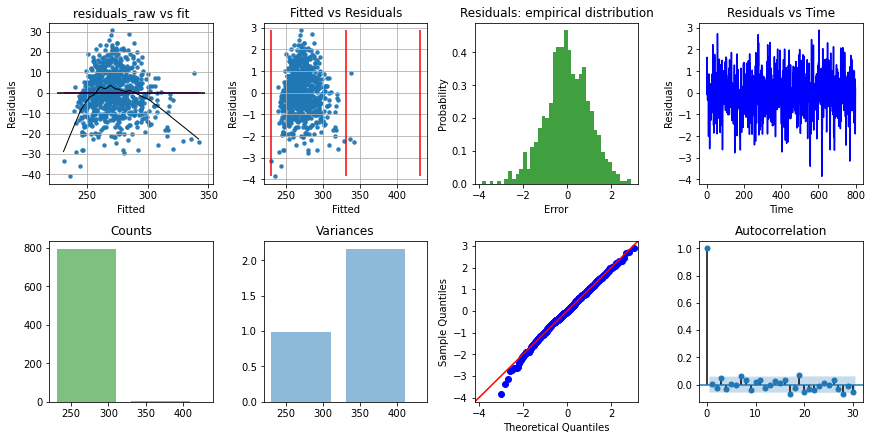

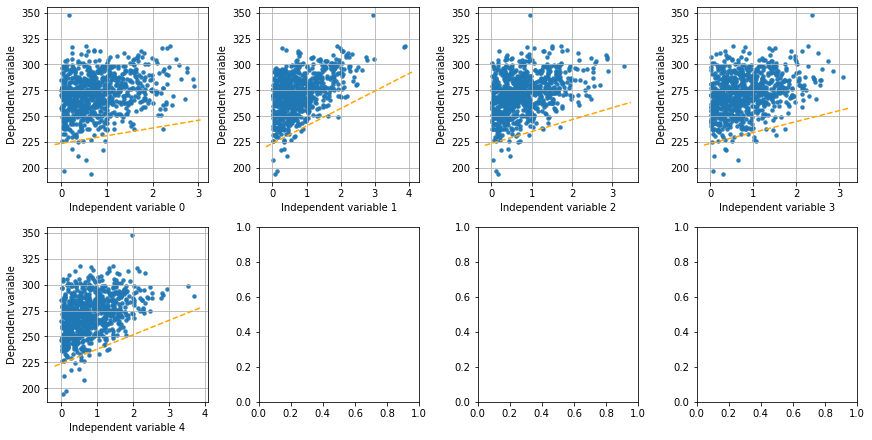

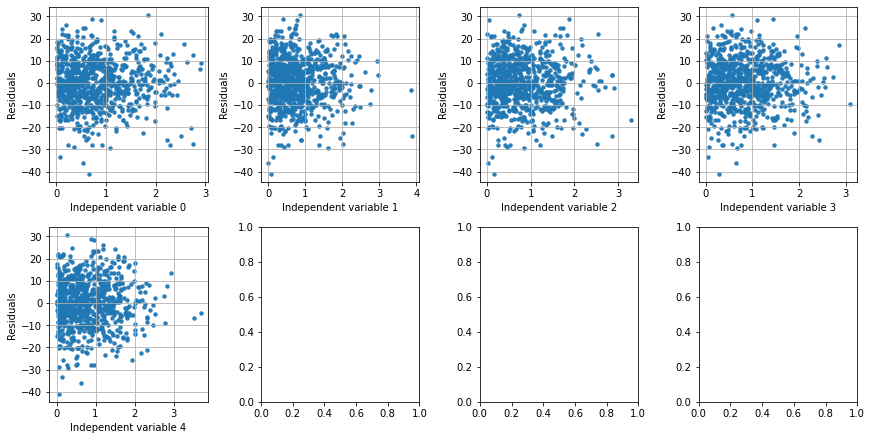

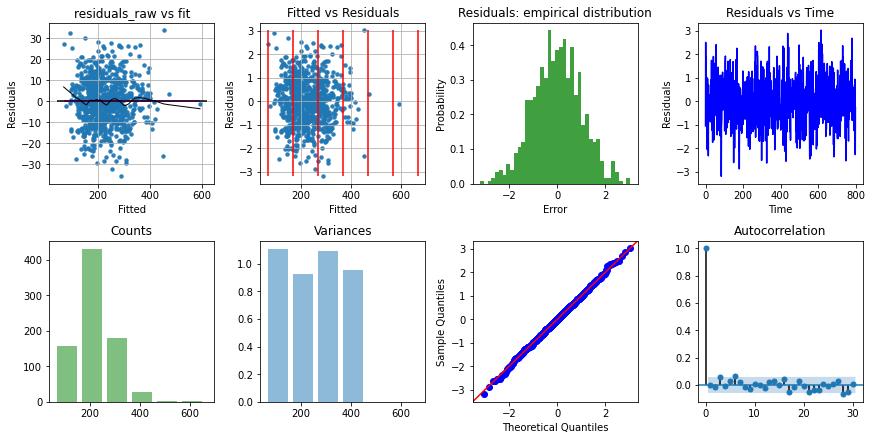

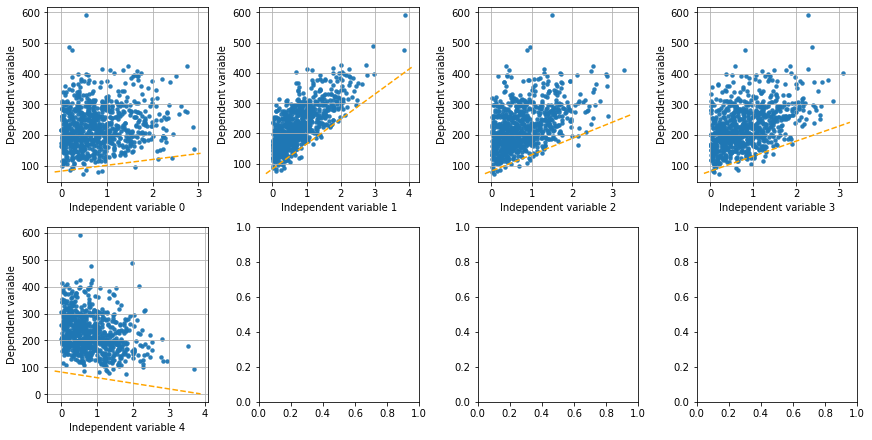

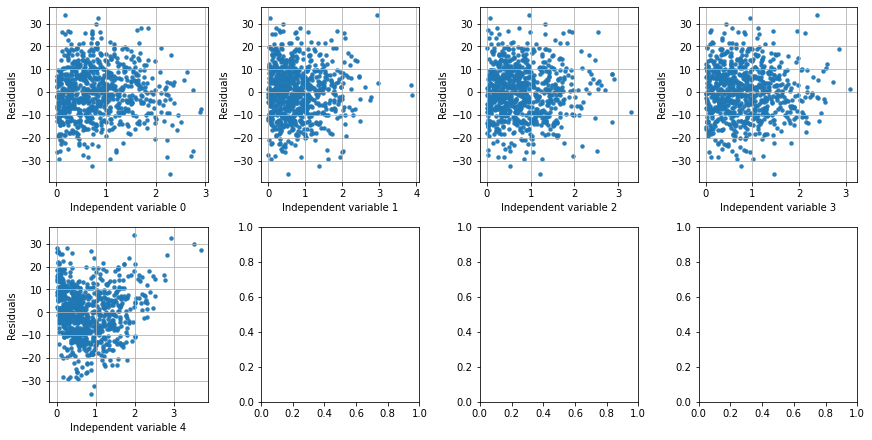

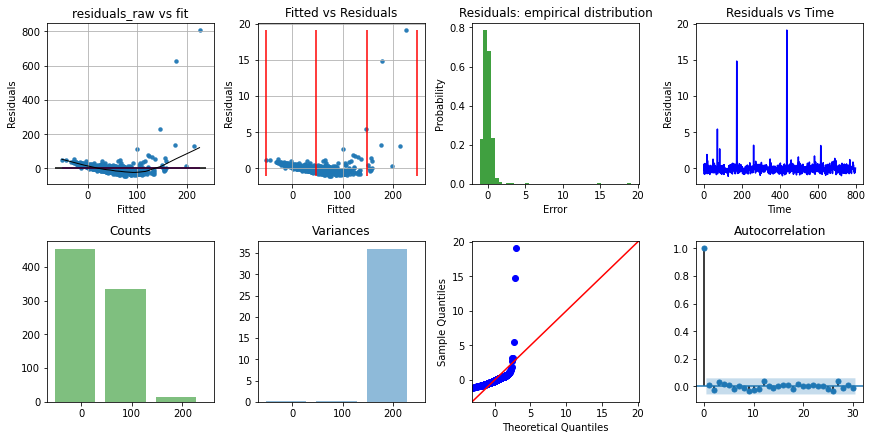

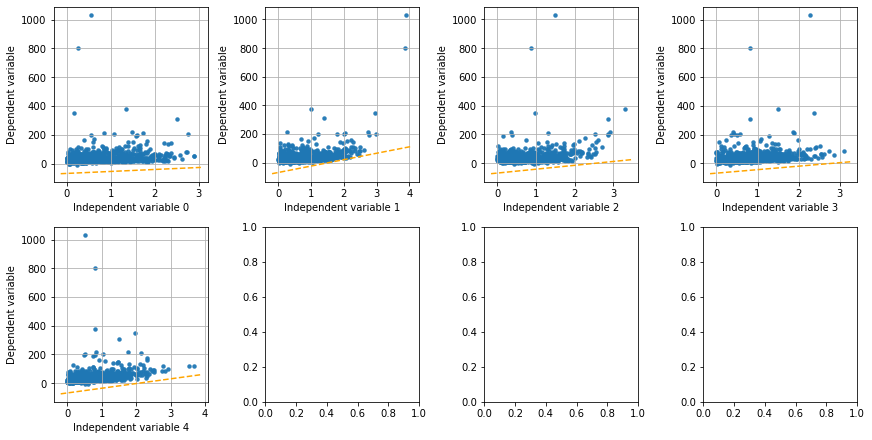

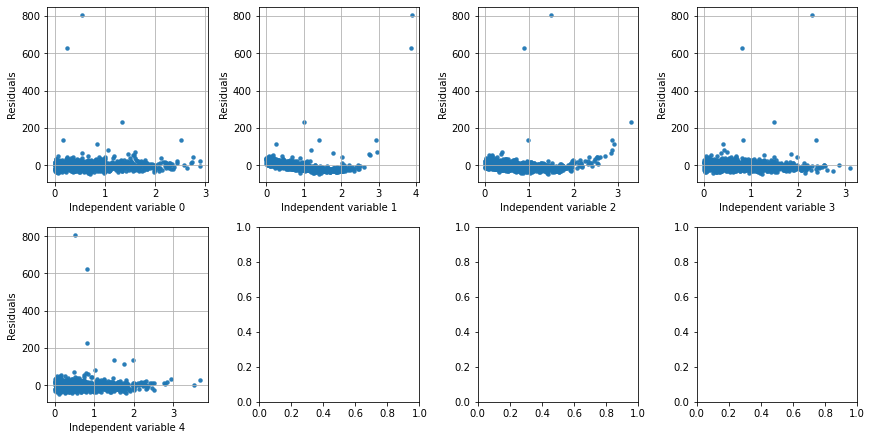

In [14]:
# file_id = [1,2,3,4,5]
file_id = [5]

for fid in file_id:
    filename = './data/ex1/mystery_nonlinear_{}.csv'
    fname = filename.format(str(fid))
    mys4 = pd.read_csv(fname)
    print(fname)
    x = mys4[linear_subset]
    y_label = [x for x in mys4.columns if x.startswith('y')]
    y = mys4[y_label]

    _,_,model,_  = train_and_diagnose(x.to_numpy(), np.squeeze(y.to_numpy()), 
                                      draw_args = {"variances_bin_type":"window", "variances_width":100}, 
                                      plot_variables=True)
    print(model.summary())

Transform the linear variables: 

In [19]:
x['x3_t'] = x['x3']**2

C:\Users\TK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Model with both x3 and x3_t: 

Expected error estimate: 2.909478213908301e-16


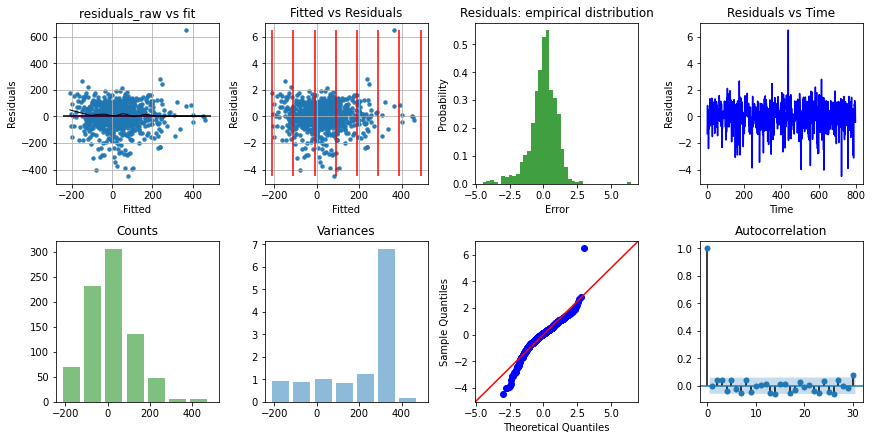

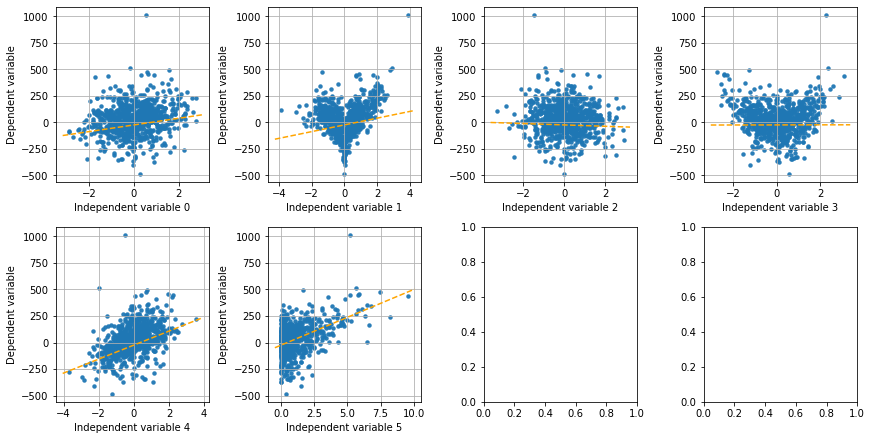

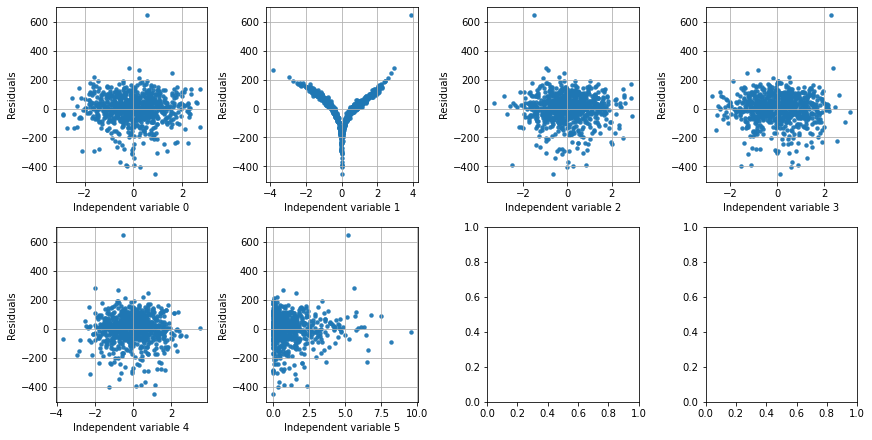

In [72]:
_,_,model1,_  = train_and_diagnose(x[linear_subset + ['x3_t']].to_numpy(), np.squeeze(y.to_numpy()), 
                                      draw_args = {"variances_bin_type":"window", "variances_width":100}, 
                                      plot_variables=True)

In [73]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     146.0
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          1.67e-124
Time:                        16:58:45   Log-Likelihood:                -4817.9
No. Observations:                 800   AIC:                             9650.
Df Residuals:                     793   BIC:                             9683.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.8765      4.462     -5.351      0.000     -32.635     -15.118
x1            31.3678      3.560      8.810      0.000      24.379      38.356
x2            31.7306      3.628      8.745      0.000      24.608      38.853
x3            -6.3871      3.609     -1.770      0.077     -13.472       0.698
x4             0.3253      3.553      0.092      0.927      -6.649       7.300
x5            65.8328      3.573     18.427      0.000      58.820      72.846
x6            52.3284      2.699     19.388      0.000      47.030      57.626
==============================================================================
Omnibus:                      117.743   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              573.037
Skew:                          -0.567   Prob(JB):                    3.69e-125
Kurtosis:                       6.988   Cond. No.                         2.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
x['x1_t'] = np.log(np.abs(x['x1']))

In [38]:
x['x2_t'] = (np.exp(x['x2']))

In [65]:
x['x1_pos'] = (x['x1']>0).astype(float)

Model with "correct" transformations: 

Expected error estimate: -4.6094917240764564e-15


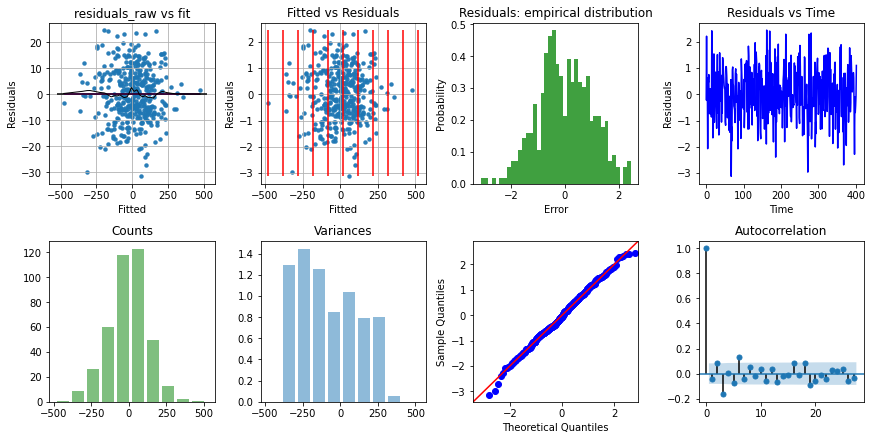

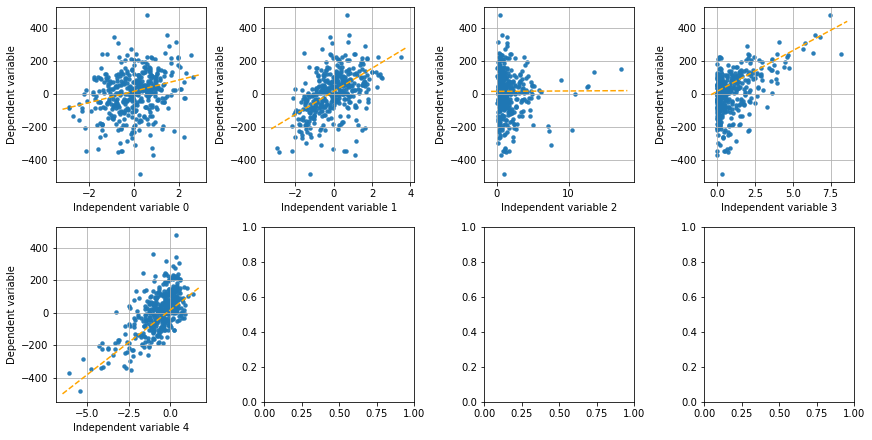

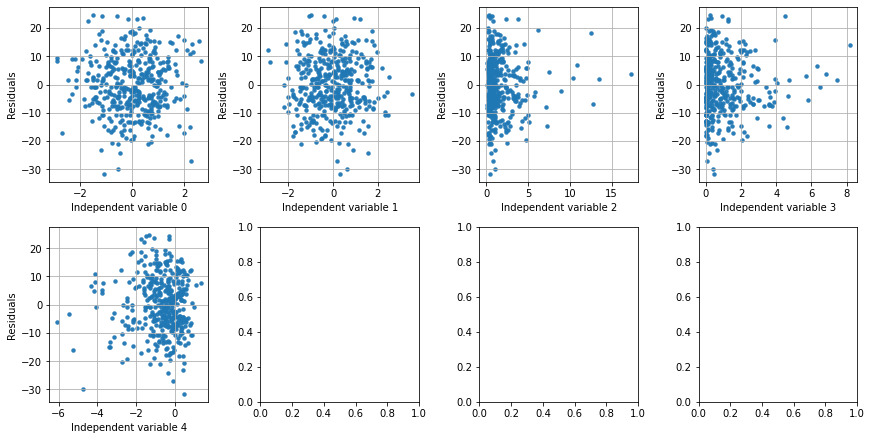

In [75]:
_,_,model2,_  = train_and_diagnose(x.query('x1_pos==0')[['x0','x4'] + ['x2_t','x3_t','x1_t']].to_numpy(), 
                                   np.squeeze(y[x['x1_pos']==0].to_numpy()), 
                                      draw_args = {"variances_bin_type":"window", "variances_width":100}, 
                                      plot_variables=True)

In [76]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.345e+04
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:16:00   Log-Likelihood:                -1503.0
No. Observations:                 403   AIC:                             3018.
Df Residuals:                     397   BIC:                             3042.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.6774      0.840     17.467      0.000      13.025      16.329
x1            34.1255      0.504     67.670      0.000      33.134      35.117
x2            69.7739      0.493    141.432      0.000      68.804      70.744
x3             0.2409      0.260      0.926      0.355      -0.270       0.752
x4            49.2723      0.402    122.633      0.000      48.482      50.062
x5            79.5296      0.463    171.911      0.000      78.620      80.439
==============================================================================
Omnibus:                        0.627   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.741
Skew:                          -0.055   Prob(JB):                        0.691
Kurtosis:                       2.822   Cond. No.                         4.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

___